### **규제 선형 모델 : 릿지, 라쏘, 엘라스틱넷**

- Cost Function은 학습 data의 잔차 오류 값을 최소로 하는 RSS 최소화 방법 & 과적합을 방지하기 위해 회귀 계수 값이 커지지 않도록 하는 방법이 서로 균형을 이뤄야 한다.

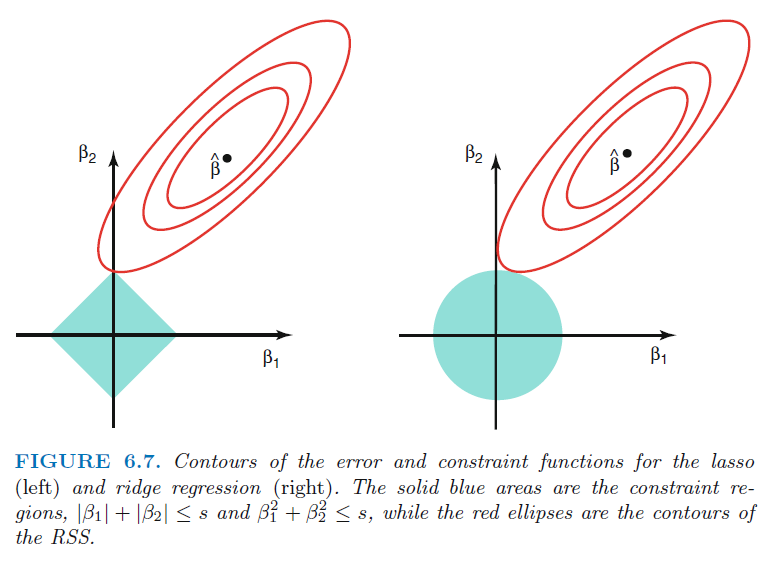

왼쪽 그림을 보면 Lasso가 몇몇 계수들을 정확하게 0으로 보내는 성질을 가지는 이유를 알 수 있다.

β^
는 least square의 점이고, 빨간 등고선은 같은 RSS의 선이다. 그리고 왼쪽 그림의 초록색 다이아몬드와 오른쪽 그림의 원이 각각 Lasso와 Ridge의 제약, 즉 |β1|+|β2|≤s
과 β21+β22≤s
이다. 각각의 방법은 해당 범위 내에서, 가능한 가장 작은 RSS를 갖는 값으로 계수를 추정한다. (s
가 충분히 커서 β^
의 점을 포함하게 된다면 앞에서도 나왔듯이 least square와 같은 값을 추정하게 된다.) 즉 추정된 계수는 해당 제약범위와 가장 작은 RSS등고선이 만나는 지점의 값이 될 것이다.

그림을 보면 알 수 있지만, Lasso의 제약범위는 사각형 형태라서, 한 축, 즉 다른 계수가 0인 지점에서 쉽게 교점이 생긴다. 예시에서는 β2
의 축에서 교점이 생겼으므로, β1=0
, 즉 X1
을 제외한 모델을 의미하게된다. 반면 Ridge는 제약범위가 원의 형태라서, 한 계수가 정확히 0인, 즉 축에서 교점이 생기기가 힘들다. 이러한 성질은 차원이 높아질때도 유지된다. 변수가 3개, 즉 3차원일때는 Lasso의 제약범위는 다면체가 되고 Ridge의 제약범위는 구가 된다.

[About Ridge, Lasso](https://godongyoung.github.io/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2018/02/07/ISL-Linear-Model-Selection-and-Regularization_ch6.html/)

### **Ridge 회귀**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
bostonDF = pd.read_csv('/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/boston_house_price.csv')
bostonDF.drop(columns='CAT.MEDV', inplace = True)
bostonDF.rename(columns={'MEDV': 'PRICE'}, inplace=True)
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# alpha = 10으로 설정해 릿지 회귀 수행
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


=> 앞 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.829보다 더 뛰어난 예측 성능을 보여준다.

In [3]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


- 각 alpha에 따른 각각의 feature의 회귀 계수 값을 시각화.
- 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

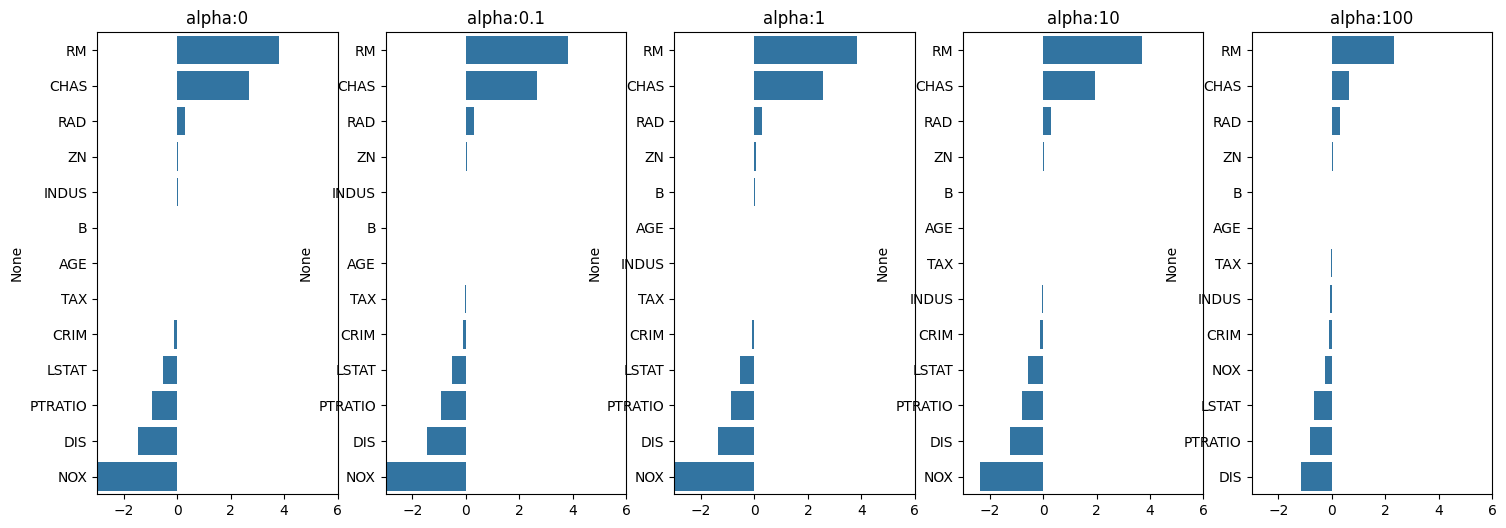

In [4]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

In [5]:
# alpha 값에 따른 컬럼별 회귀계수 출력
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


- alpha 값을 계속 증가시킬수록 회귀 계수 값은 지속적으로 작아짐을 알 수 있다. but 릿지 회귀의 경우, 어떠한 feature도 회귀 계수를 0으로 만들지는 않는다.

### **Lasso 회귀**

- W의 절댓값에 패널티를 부여하는 L1 규제를 선형 회귀에 적용한 것이 lasso 회귀
- L2 규제가 회귀 계수의 크기를 감소시키는 데 반해, L1 규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거
- L1 규제는 적절한 feature만 회귀에 포함시키는 피처 선택의 특성을 가지고 있음

In [7]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose :
      print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출

        model.fit(X_data_n , y_target_n) # alpha=param

        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff

    return coeff_df

- cross_val_score는 교차 검증(cross-validation)에 대한 평가 지표만을 반환하며, 최고의 매개변수로 학습된 모델을 반환하지는 않습니다.
- 최고의 매개변수로 학습된 모델을 얻기 위해서는 교차 검증을 수행한 후 최적의 매개변수를 사용하여 모델을 다시 학습해야 합니다.

>교차 검증 후 최고의 매개변수로 학습된 모델을 반환하는 GridSearchCV
- 이 함수는 주어진 모델과 매개변수 그리드를 기반으로 교차 검증을 수행하고, 최적의 매개변수로 학습된 모델을 반환


```python
from sklearn.model_selection import GridSearchCV

def get_best_model(model, param_grid, X_data, y_target):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_data, y_target)

    # 최적의 매개변수로 학습된 모델 반환
    best_model = grid_model.best_estimator_
    
    return best_model

# 예제 사용법
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = Ridge()
best_ridge_model = get_best_model(ridge_model, param_grid=ridge_params, X_data=X_data, y_target=y_target)

```



In [8]:
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


In [9]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 Feature별 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


=> alpha의 크기가 증가함에 따라 일부 피쳐의 회귀 계수는 아예 0으로 바뀜을 알 수 있다.

- 회귀 계수가 0인 feature는 회귀 식에서 제외되면서 feature 선택의 효과를 얻을 수 있다.

### **엘라스틱넷 회귀**

- L2 규제와 L1 규제를 결합한 회귀
- Lasso 회귀 (L1 규제)는 서로 상관관계가 높은 feature들의 경우에 이들 중에서 중요 feature만을 selection하고 다른 feature들은 모두 회귀 계수를 0으로 만드는 성향이 강하고, 이러한 성향으로 인해 alpha 값에 따라 회귀 계수의 값이 급격히 변동하기도 하는 단점이 있다.
- 그래서 이러한 점을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것이 엘라스틱넷 회귀이다.
- 그러나, L1, L2 규제가 결합된 규제로 인해 수행 시간이 상대적으로 오래 걸린다는 단점이 있다.

- 주요 parameter => alpha, l1 ratio
- ElasticNet 클래스의 alpha 파라미터는 Ridge, Lasso class의 alpha값과는 다르다
- 엘라스틱 넷의 규제 : RSS(W) + a * L1 + b * L2
- ElasticNet 클래스의 alpha 값은 a + b이다.
- l1_ratio : a / (a+b)


In [10]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


In [11]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
- coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha값에 따른 feature들의 회귀 계수들 값이 lasso 보다는 상대적으로 0이 되는 값이 적다.

> 이들 중 어떤 것이 가장 좋은 규제인지는 상황에 따라 다르다.

- 각각의 알고리즘에서 하이퍼 파라미터를 변경해 가면서 최적의 예측 성능을 찾아내야 한다. **그러나, 선형 회귀의 경우 최적의 하이퍼 파라미터를 찾아내는 것 못지않게 먼저 data 분포도의 정규화와 인코딩 방법이 중요하다.**